# Лабораторна робоат № 4. ІП-14 Бабіч Денис

## Підготовчий етап

### Імпортування необхідних модулів

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

### Створення допоміжних функцій

In [2]:
def rename_column(dataframe: pd.DataFrame, old_column_name: str, new_column_name: str) -> None:
    if old_column_name in dataframe.columns:
        dataframe = dataframe.rename(columns = {old_column_name: new_column_name}, inplace = True)


def convert_column(dataframe: pd.DataFrame, column_name: str, data_type: type) -> None:
    if column_name in dataframe.columns:
        dataframe[column_name] = pd.to_numeric(dataframe[column_name], errors = "coerce")
        dataframe[column_name] = dataframe[column_name].apply(lambda x: None if pd.isna(x) or np.isinf(x) else x)
        dataframe[column_name] = dataframe[column_name].astype(data_type, errors = "ignore")


def build_confusion_matrix(model: any, x_test: list, y_test: list) -> None:
    plt.figure(figsize = (8, 5))
    sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot = True, fmt = ".1f", cmap = "coolwarm")
    plt.xlabel("Передбачені значення")
    plt.show()


def build_tree_visualization(model: any, feature_names: list, class_names: list) -> None:
    plt.figure(figsize = (25, 20))
    plot_tree(model, feature_names = feature_names, class_names = class_names, filled = False, rounded = True)

### Заповнення датафрейму

In [3]:
# loc             : numeric % McCabe's line count of code
# v(g)            : numeric % McCabe "cyclomatic complexity"
# ev(g)           : numeric % McCabe "essential complexity"
# iv(g)           : numeric % McCabe "design complexity"
# n               : numeric % Halstead total operators + operands
# v               : numeric % Halstead "volume"
# l               : numeric % Halstead "program length"
# d               : numeric % Halstead "difficulty"
# i               : numeric % Halstead "intelligence"
# e               : numeric % Halstead "effort"
# b               : numeric % Halstead 
# t               : numeric % Halstead's time estimator
# lOCode          : numeric % Halstead's line count
# lOComment       : numeric % Halstead's count of lines of comments
# lOBlank         : numeric % Halstead's count of blank lines
# lOCodeAndComment: numeric
# uniq_Op         : numeric % unique operators
# uniq_Opnd       : numeric % unique operands
# total_Op        : numeric % total operators
# total_Opnd      : numeric % total operands
# branchCount     : numeric % of the flow graph
# defects         : {false,true} % module has/has not one or more % reported defects

software_defects_data = pd.read_csv("SoftwareDefects.csv", sep = ',', encoding = "utf-8")

rename_column(software_defects_data, "loc", "McCabe's lines")
convert_column(software_defects_data, "McCabe's lines", int)

rename_column(software_defects_data, "v(g)", "McCabe's cyclomatic complexity")
convert_column(software_defects_data, "McCabe's cyclomatic complexity", int)

rename_column(software_defects_data, "ev(g)", "McCabe's essential complexity")
convert_column(software_defects_data, "McCabe's essential complexity", int)

rename_column(software_defects_data, "iv(g)", "McCabe's design complexity")
convert_column(software_defects_data, "McCabe's design complexity", int)

rename_column(software_defects_data, "n", "Halstead's total operators and operands")
convert_column(software_defects_data, "Halstead's total operators and operands", int)

rename_column(software_defects_data, "v", "Halstead's volume")
convert_column(software_defects_data, "Halstead's volume", float)

rename_column(software_defects_data, "l", "Halstead's program length")
convert_column(software_defects_data, "Halstead's program length", float)

rename_column(software_defects_data, "d", "Halstead's difficulty")
convert_column(software_defects_data, "Halstead's difficulty", float)

rename_column(software_defects_data, "i", "Halstead's intelligence")
convert_column(software_defects_data, "Halstead's intelligence", float)

rename_column(software_defects_data, "e", "Halstead's effort")
convert_column(software_defects_data, "Halstead's effort", float)

rename_column(software_defects_data, "b", "Halstead's estimator")
convert_column(software_defects_data, "Halstead's estimator", float)

rename_column(software_defects_data, "t", "Halstead's Time estimator")
convert_column(software_defects_data, "Halstead's Time estimator", float)

rename_column(software_defects_data, "lOCode", "Halstead's lines")
convert_column(software_defects_data, "Halstead's lines", int)

rename_column(software_defects_data, "lOComment", "Halstead's comments")
convert_column(software_defects_data, "Halstead's comments", int)

rename_column(software_defects_data, "lOBlank", "Halstead's blank lines")
convert_column(software_defects_data, "Halstead's blank lines", int)

rename_column(software_defects_data, "locCodeAndComment", "Halstead's lines with comments")
convert_column(software_defects_data, "Halstead's lines with comments", int)

rename_column(software_defects_data, "uniq_Op", "Unique operators")
convert_column(software_defects_data, "Unique operators", int)

rename_column(software_defects_data, "uniq_Opnd", "Unique operands")
convert_column(software_defects_data, "Unique operands", int)

rename_column(software_defects_data, "total_Op", "Total operators")
convert_column(software_defects_data, "Total operators", int)

rename_column(software_defects_data, "total_Opnd", "Total operands")
convert_column(software_defects_data, "Total operands", int)

rename_column(software_defects_data, "branchCount", "Branches")
convert_column(software_defects_data, "Branches", int)

rename_column(software_defects_data, "defects", "Defects")
convert_column(software_defects_data, "Defects", int)

software_defects_data.replace('?', np.nan, inplace = True)
software_defects_data.dropna(axis = 0, how = "any", inplace = True)

software_defects_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10880 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   McCabe's lines                           10880 non-null  int32  
 1   McCabe's cyclomatic complexity           10880 non-null  int32  
 2   McCabe's essential complexity            10880 non-null  int32  
 3   McCabe's design complexity               10880 non-null  int32  
 4   Halstead's total operators and operands  10880 non-null  int32  
 5   Halstead's volume                        10880 non-null  float64
 6   Halstead's program length                10880 non-null  float64
 7   Halstead's difficulty                    10880 non-null  float64
 8   Halstead's intelligence                  10880 non-null  float64
 9   Halstead's effort                        10880 non-null  float64
 10  Halstead's estimator                     10880

## Основний етап

### Побудова візуалізацій

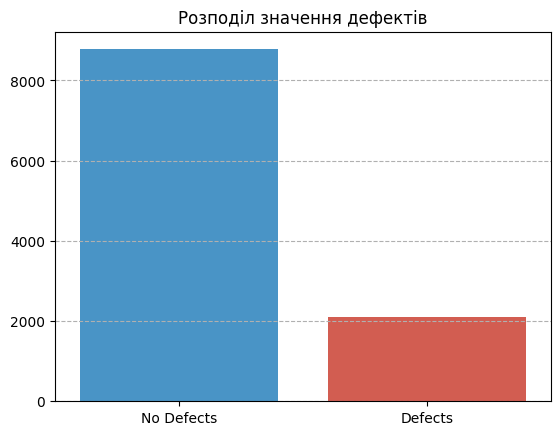

In [4]:
sns.barplot(x = ["No Defects", "Defects"], y = software_defects_data["Defects"].value_counts(), palette = ["#3498db", "#e74c3c"])
plt.title("Розподіл значення дефектів")
plt.grid(axis = 'y', linestyle = "--")
plt.ylabel('')
plt.show()

### Кореляція між факторами

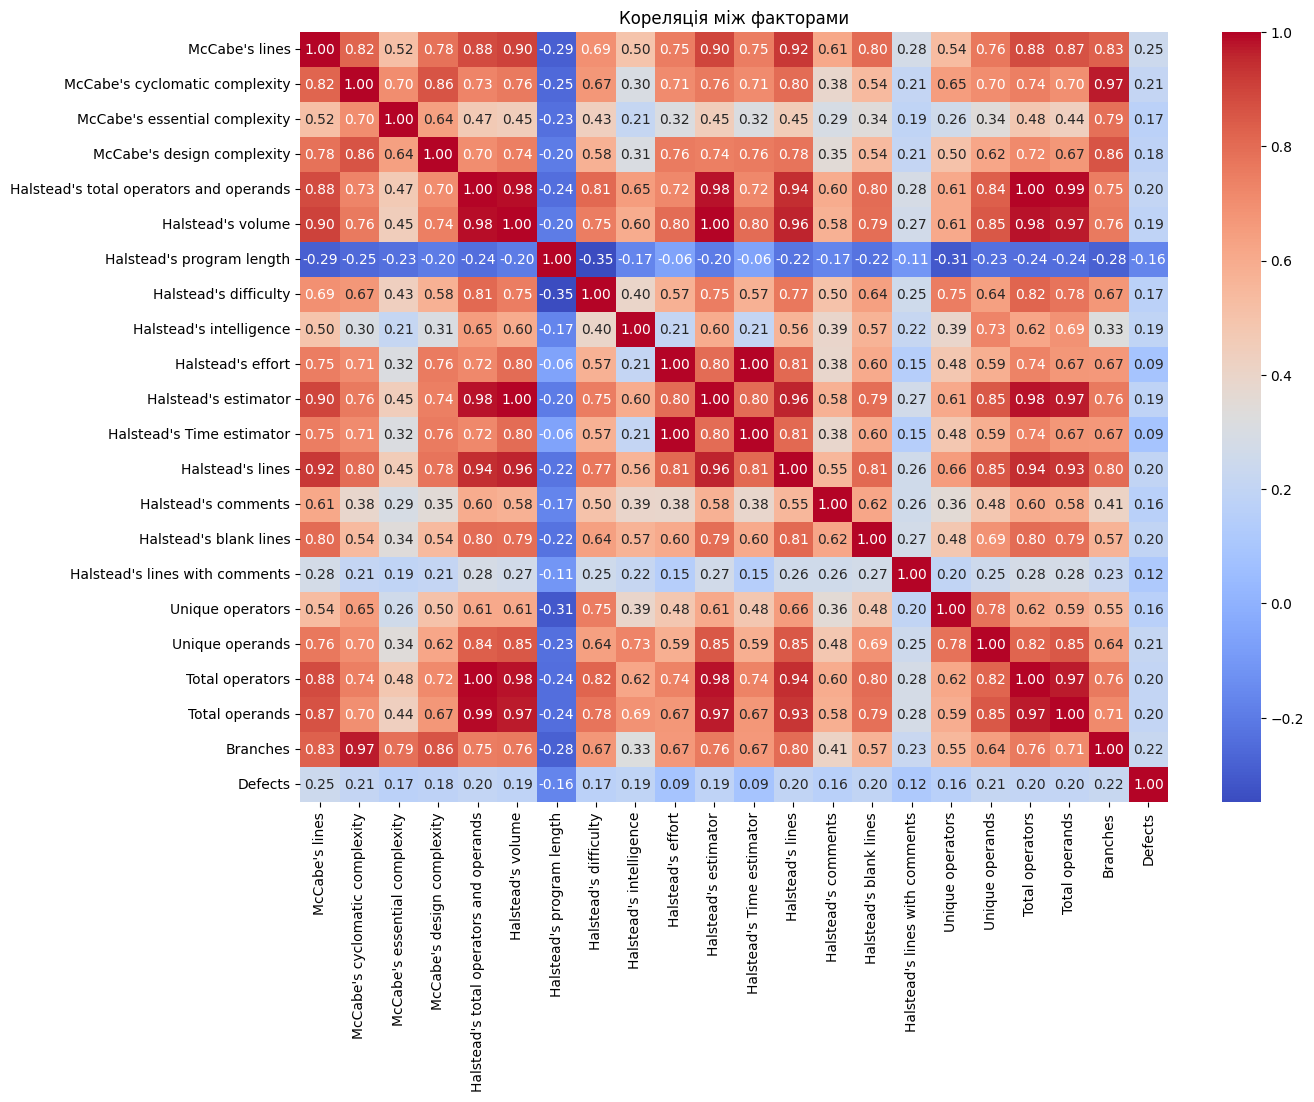

In [5]:
plt.figure(figsize = (14, 10))
sns.heatmap(software_defects_data.corr(), annot = True, cmap = "coolwarm", fmt = '.2f')
plt.title("Кореляція між факторами")
plt.show()

### Побудова аналітичного рішення

#### Підготовка даних

In [6]:
x = software_defects_data.drop(columns = ["Halstead's program length", "Defects"], axis = 1)
y = software_defects_data["Defects"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, random_state = 0)
parameters = {"max_depth": [i for i in range(1, 5)]}
results = list()

#### Decision Tree Classifier

Best max_depth:  3
Train score: 0.80813
Test score: 0.81801


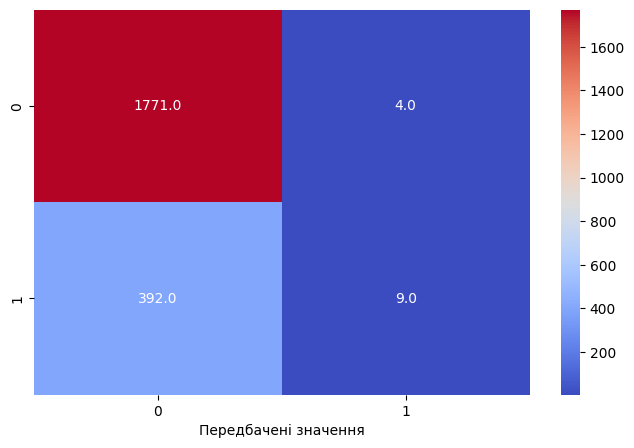

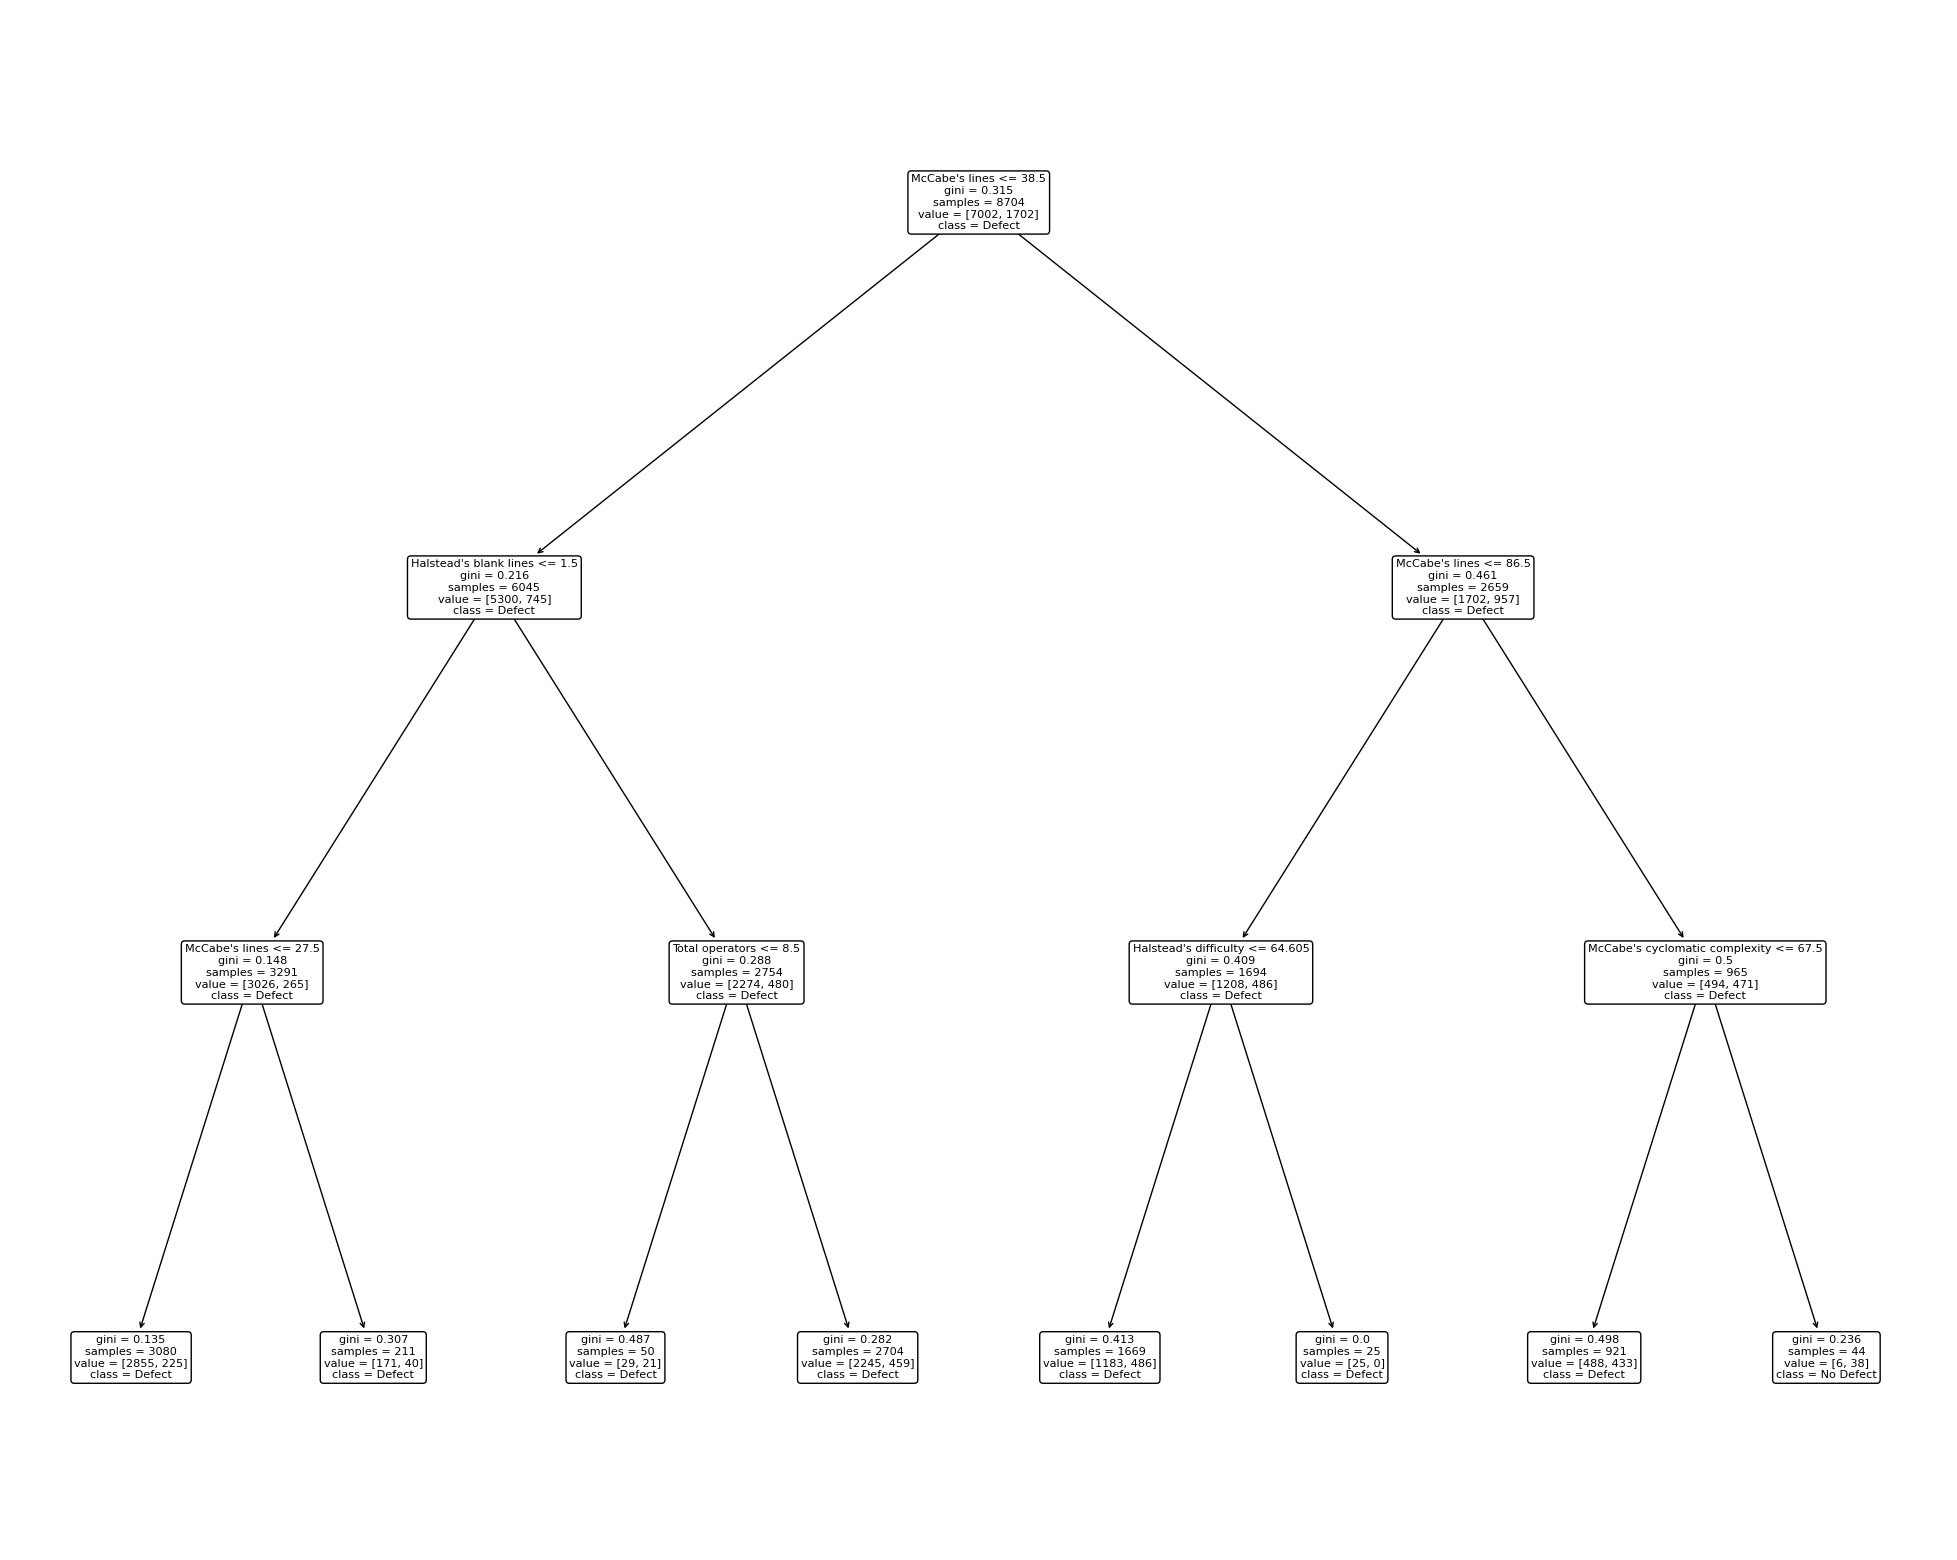

In [7]:
grid_search_results = GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5).fit(x_train, y_train)
print(f"Best max_depth: ", grid_search_results.best_params_["max_depth"])

decision_tree_classifier = grid_search_results.best_estimator_.fit(x_train, y_train)

train_score = round(decision_tree_classifier.score(x_train, y_train), 5)
test_score = round(decision_tree_classifier.score(x_test, y_test), 5)
results.append({"Model": "Decision Tree\nClassifier", "R^2 Score": train_score, "Type": "Train"})
results.append({"Model": "Decision Tree\nClassifier", "R^2 Score": test_score, "Type": "Test"})
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

build_confusion_matrix(decision_tree_classifier, x_test, y_test)
build_tree_visualization(decision_tree_classifier, x.columns.to_list(), ["Defect", "No Defect"])

#### Gradient Boosting Classifier

Best parameters: 3
Train score: 0.82468
Test score: 0.81985


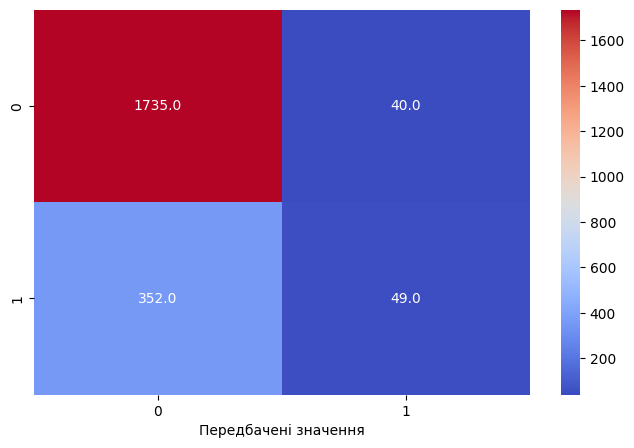

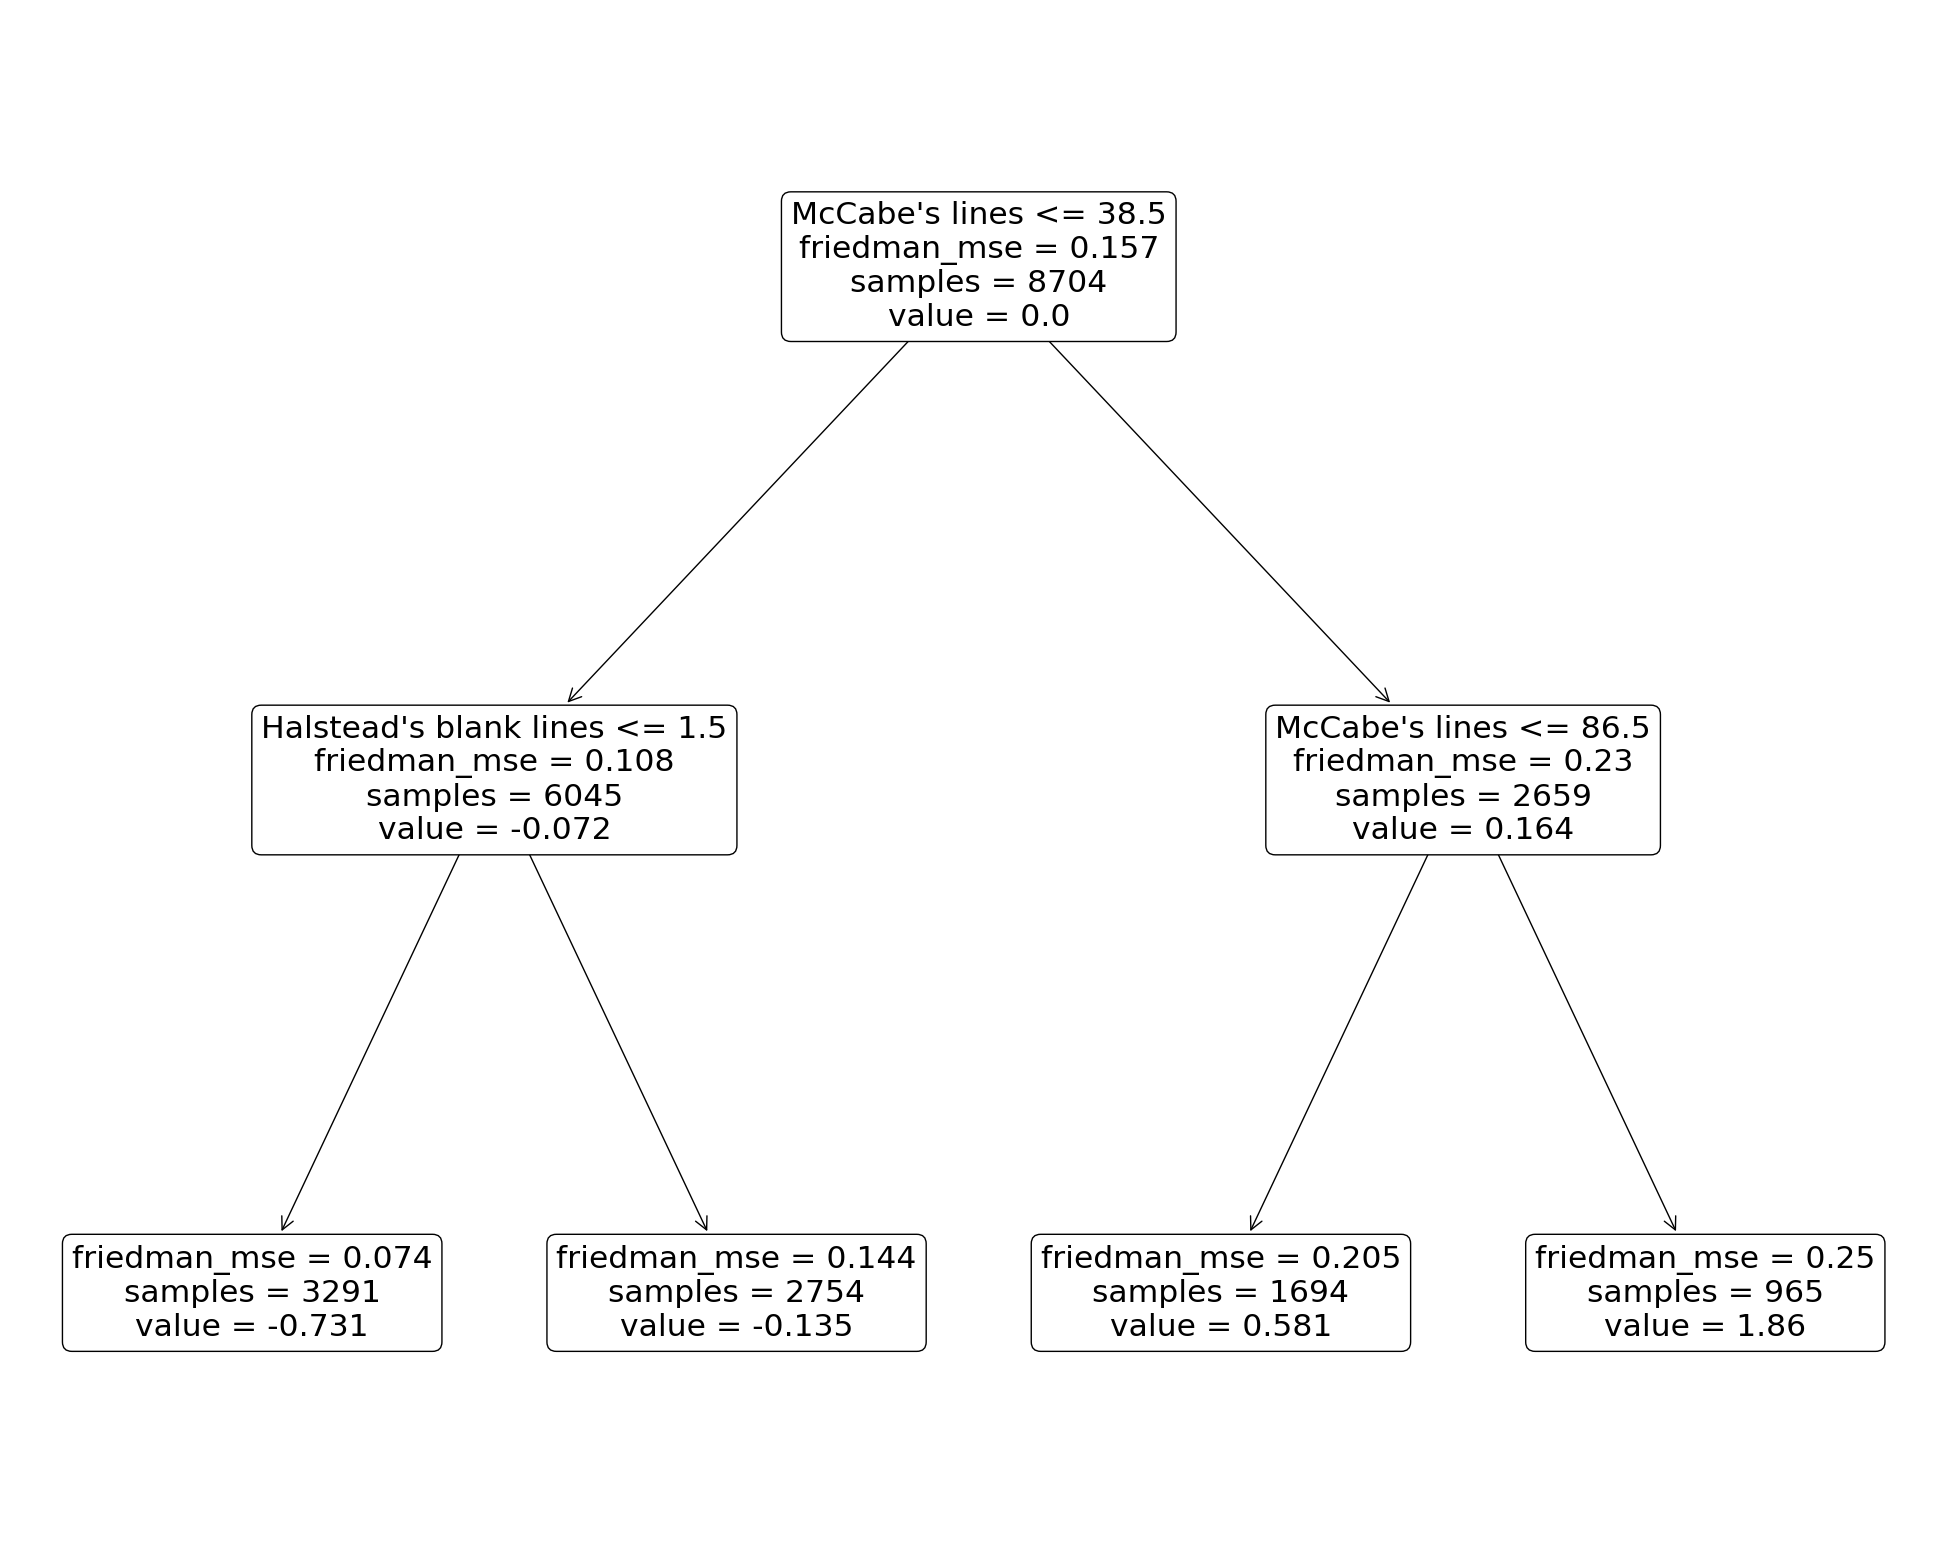

In [8]:
grid_serch_results = GridSearchCV(GradientBoostingClassifier(), parameters, cv = 5).fit(x_train, y_train)
print("Best parameters:", grid_search_results.best_params_["max_depth"])

gradient_boosting_classifier = grid_serch_results.best_estimator_.fit(x_train, y_train)

train_score = round(gradient_boosting_classifier.score(x_train, y_train), 5)
test_score = round(gradient_boosting_classifier.score(x_test, y_test), 5)
results.append({"Model": "Gradient Boosting\nClassifier", "R^2 Score": train_score, "Type": "Train"})
results.append({"Model": "Gradient Boosting\nClassifier", "R^2 Score": test_score, "Type": "Test"})
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

build_confusion_matrix(gradient_boosting_classifier, x_test, y_test)
build_tree_visualization(gradient_boosting_classifier.estimators_[0][0], x.columns.to_list(), ["Defect", "No Defect"])

#### Random Forest Classifier

Best parameters: 3
Train score: 0.8179
Test score: 0.81893


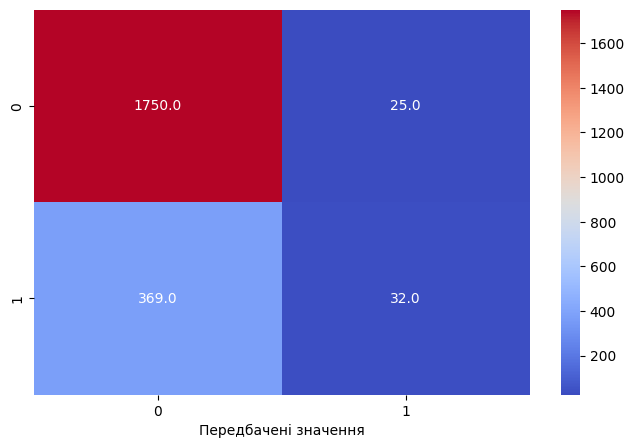

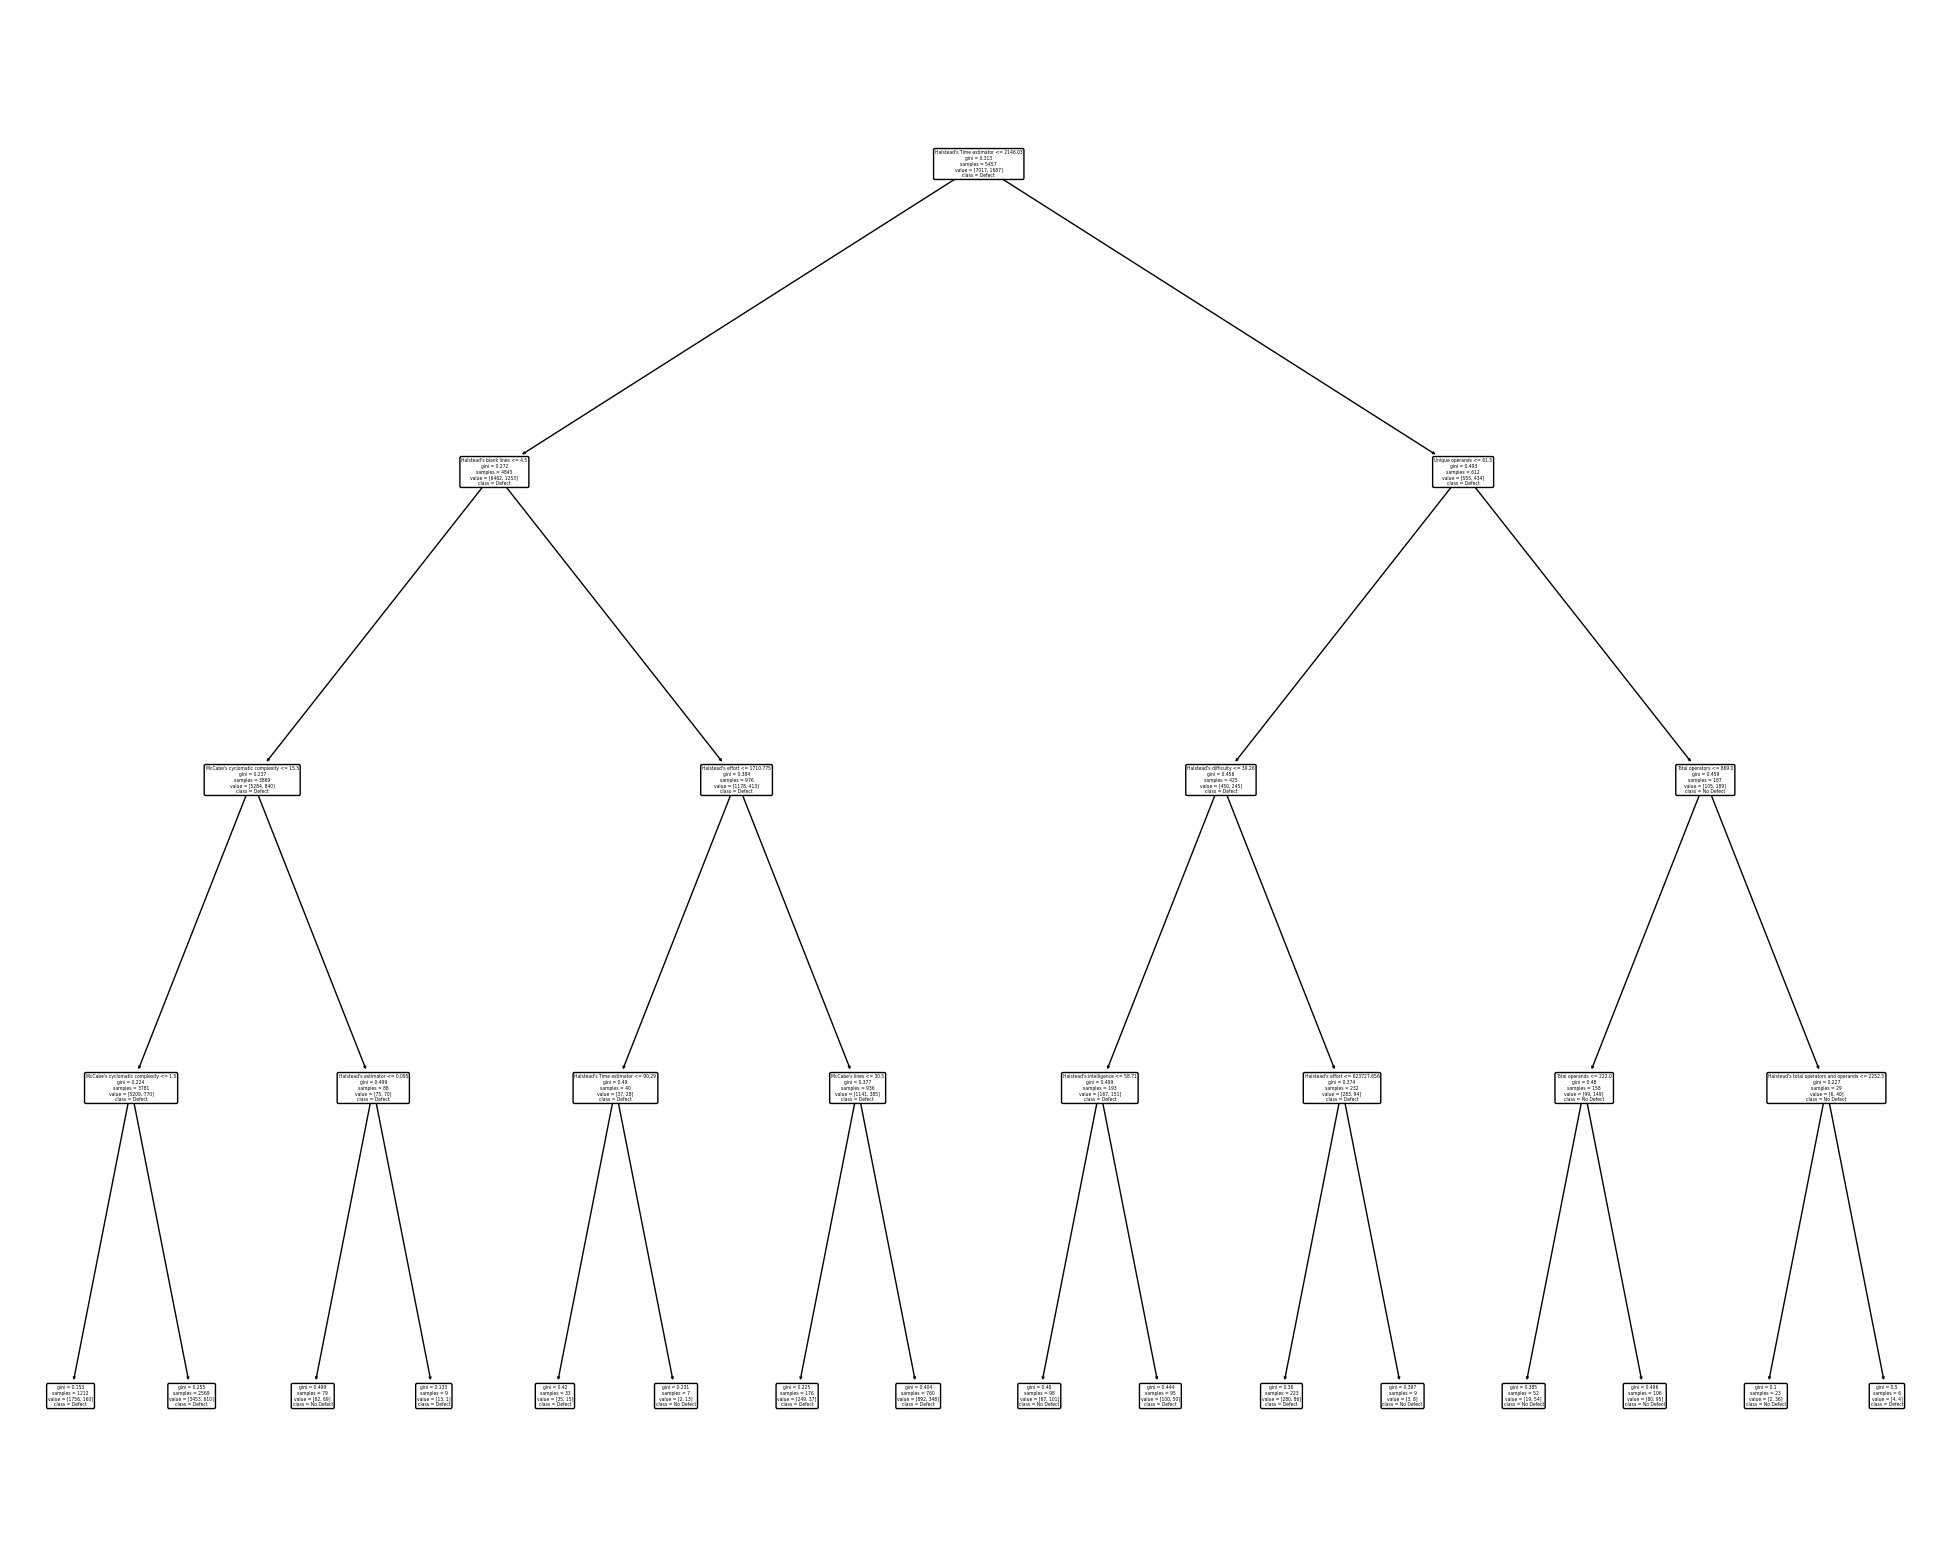

In [9]:
grid_serch_results = GridSearchCV(RandomForestClassifier(n_jobs = -1), parameters, cv = 5).fit(x_train, y_train)
print("Best parameters:", grid_search_results.best_params_["max_depth"])

random_forest_classifier = grid_serch_results.best_estimator_.fit(x_train, y_train)

train_score = round(random_forest_classifier.score(x_train, y_train), 5)
test_score = round(random_forest_classifier.score(x_test, y_test), 5)
results.append({"Model": "Random Forest\nClassifier", "R^2 Score": train_score, "Type": "Train"})
results.append({"Model": "Random Forest\nClassifier", "R^2 Score": test_score, "Type": "Test"})
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

build_confusion_matrix(random_forest_classifier, x_test, y_test)
build_tree_visualization(random_forest_classifier.estimators_[0], x.columns.to_list(), ["Defect", "No Defect"])

#### Аналіз результатів

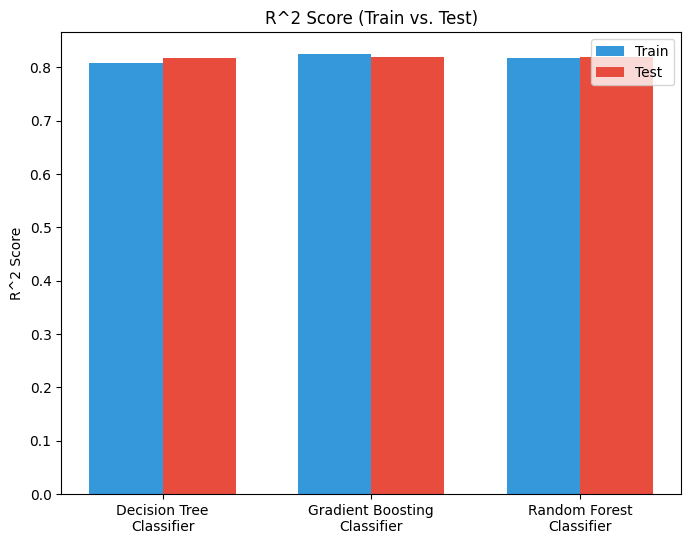

In [10]:
train_data = [result["R^2 Score"] for result in results if result["Type"] == "Train"]
test_data = [result["R^2 Score"] for result in results if result["Type"] == "Test"]
model_names = [result["Model"] for result in results if result["Type"] == "Train"]

BAR_WIDTH = 0.35
indices = np.arange(len(model_names))

plt.figure(figsize = (8, 6))
plt.bar(indices, train_data, BAR_WIDTH, label = "Train", color = "#3498db")
plt.bar(indices + BAR_WIDTH, test_data, BAR_WIDTH, label = "Test", color = "#e74c3c")
plt.ylabel("R^2 Score")
plt.title("R^2 Score (Train vs. Test)")
plt.xticks(indices + BAR_WIDTH / 2, model_names)
plt.legend()
plt.show()